<a href="https://colab.research.google.com/github/kimdesok/3D-Mnist-3D-Convolution-3D-CNN/blob/main/VolatilityIndex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## VIX Index
From Investopedia.com
>* Cboe Volatility Index(VIX) is a real time index that represents a market expecation of its volatilty over the coming 30 days. 
>* The VIX value of 30% means many investors expect that S&P 500 index may change in 30% of its value in the near future. 
>* It is used to evaluate the sentiment among traders including the level of fears, risks, stress, etc.



In [51]:
# matplotlib
import matplotlib.pyplot as plt

plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (14, 8)
plt.rcParams["axes.formatter.useoffset"] = False
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["axes.formatter.limits"] = -10000, 10000

## FinanceDataReader

In [52]:
!pip install -q finance-datareader

## An Example
The stock price of Texas Instrument(TXN) showed a wider price swing compared to the one of Eli Lilly & Co.(LLY) (See the grayed area).  Thus, TXN had higher volatility than LLY over the one-month period.  

However, during July to Sept., LLY shows a much wider swing. Thus, LLY had higher volatility than TXN during this three-month period.

Volatility is supposed to measure such magnitude of price movements that a financial instrument experiences over a certain period of time. 

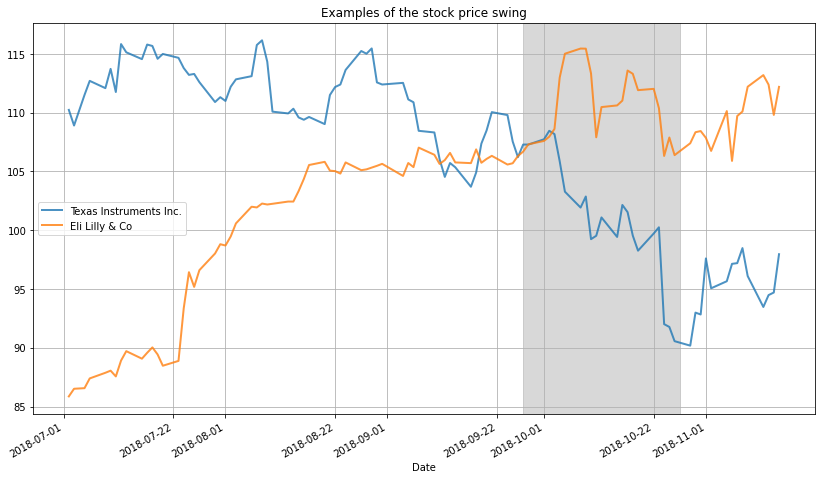

In [53]:
import FinanceDataReader as fdr
import pandas as pd

codes=[['Texas Instruments Inc.', 'TXN'], ['Eli Lilly & Co', 'LLY']]
df_list = [fdr.DataReader(code,'2018-07-01', '2018-11-15')['Close'] for name, code in codes]

df = pd.concat(df_list, axis=1)
df.columns = [name for name, code in codes] 
df.head(10)

ax = df.plot(lw=2, alpha=0.8, title='Examples of the stock price swing')
ax.axvspan('2018-09-27', '2018-10-27', alpha=0.3, color='gray') 

Volatility is also measured by more subtle way, involving the option prices.  
Suppose we are experiencing a period of high volatility, we may seek a derivative instrument such as option to sustain the return.  In that case, a certain option prices may reach to higer levels.

## VIX data

Now we look at the volatility at the market level upon looking into its level at the indiviual equity.

One of the first indicators for the market volatility is known to be the Cboe VIX, representing the S&P 500 as market index.


In [60]:
codes=[['Volatility', 'VIX'], ['S&P500', 'US500'], ['KOSPI', 'KS11']]
df0 = fdr.DataReader('VIX','2006-01-01')['Close']
df1 = fdr.DataReader('US500','2006-01-01')['Close']
df2 = fdr.DataReader('KS11', '2006-01-01')['Close']
#print(df1.head())
df = pd.concat([df0,df1, df2], axis=1).dropna()
df.columns = [name for name, code in codes] 
print(df.head(10))

            Volatility   S&P500    KOSPI
Date                                    
2006-01-04       11.37  1273.46  1402.11
2006-01-05       11.31  1273.48  1395.51
2006-01-06       11.00  1285.45  1412.78
2006-01-09       11.13  1290.15  1408.33
2006-01-10       10.86  1289.69  1396.29
2006-01-11       10.94  1294.18  1394.09
2006-01-12       11.20  1286.06  1402.58
2006-01-13       11.23  1287.61  1416.28
2006-01-17       11.91  1283.03  1389.58
2006-01-18       12.25  1277.93  1352.91


Text(2020, 70, 'Pandemic')

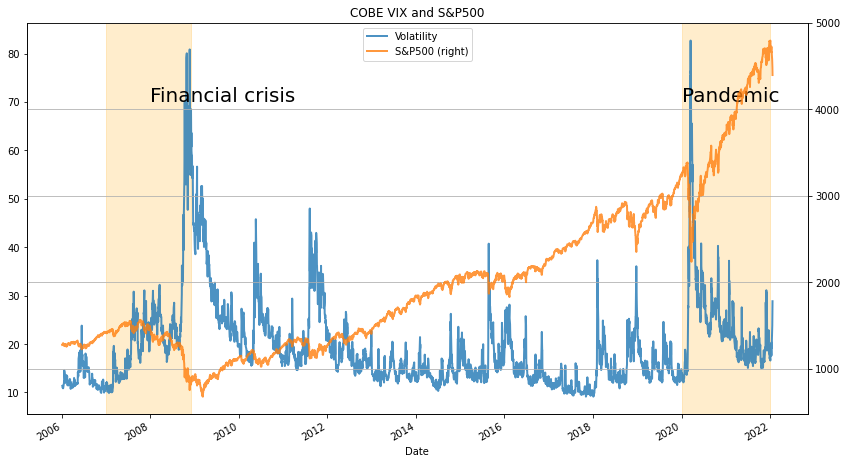

In [63]:
ax = df[['Volatility','S&P500']].plot(lw=2, alpha=0.8, title='COBE VIX and S&P500', secondary_y=['S&P500'])
ax.axvspan('2007-01', '2008-12', color='orange', alpha=0.2)
ax.annotate('Financial crisis', xy=('2008', 70), fontsize=20) 
ax.axvspan('2020-01', '2022-01', color='orange', alpha=0.2)
ax.annotate('Pandemic', xy=('2020', 70), fontsize=20)

            Volatility   S&P500    KOSPI
Date                                    
2022-01-07       18.76  4677.02  2954.89
2022-01-10       19.40  4670.29  2926.72
2022-01-11       18.41  4713.07  2927.38
2022-01-12       17.62  4726.35  2972.48
2022-01-13       20.31  4659.02  2962.09
2022-01-14       19.19  4662.85  2921.92
2022-01-18       22.79  4577.34  2864.24
2022-01-19       23.85  4532.76  2842.28
2022-01-20       25.59  4482.73  2862.68
2022-01-21       28.85  4397.93  2834.29


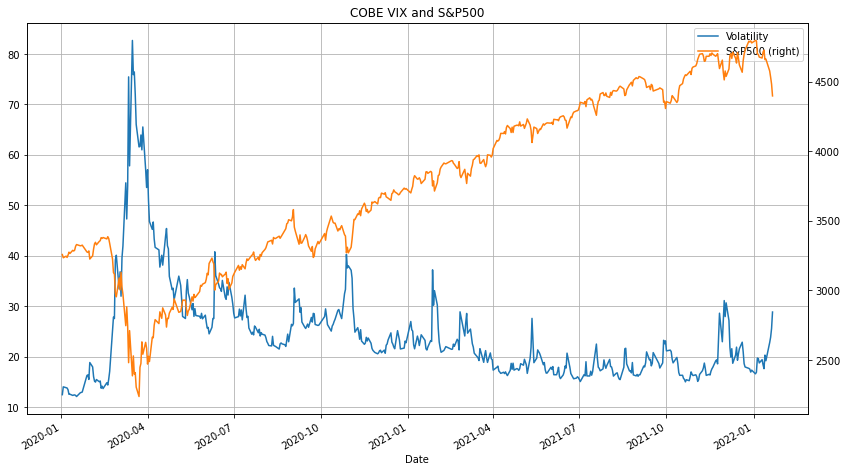

In [65]:
values = df[['Volatility','S&P500']]['2020-01-01':'2022-01-22']
ax = values.plot(figsize=(14,8), grid=True, title='COBE VIX and S&P500', secondary_y=['S&P500'])
plt.grid()
print(df.tail(10))

Text(2020, 70, 'Pandemic')

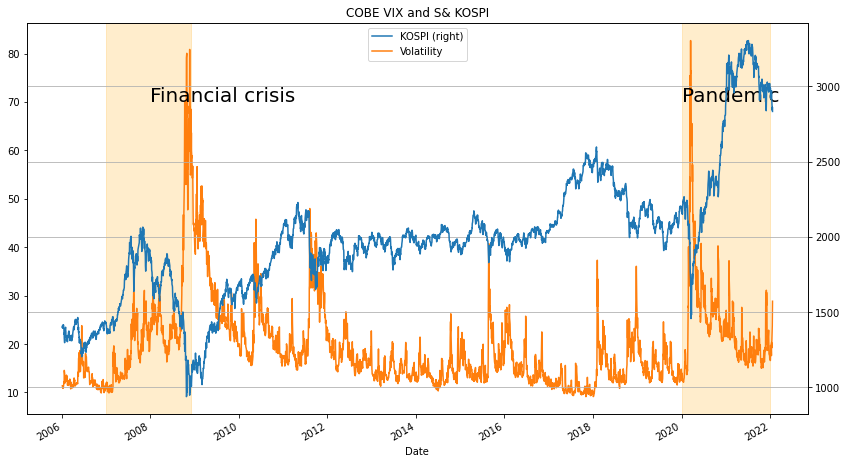

In [70]:
ax = df[['KOSPI', 'Volatility']].plot(title='COBE VIX and S& KOSPI', secondary_y='KOSPI')
ax.axvspan('2007-01', '2008-12', color='orange', alpha=0.2)
ax.annotate('Financial crisis', xy=('2008', 70), fontsize=20) 
ax.axvspan('2020-01', '2022-01', color='orange', alpha=0.2)
ax.annotate('Pandemic', xy=('2020', 70), fontsize=20)

## Correlation between three indexes

In [68]:
df.corr()

,Volatility,S&P500,KOSPI
Volatility,1.000000,-0.203292,-0.306276
S&P500,-0.203292,1.000000,0.864079
KOSPI,-0.306276,0.864079,1.000000


## S&P 500 VIX future

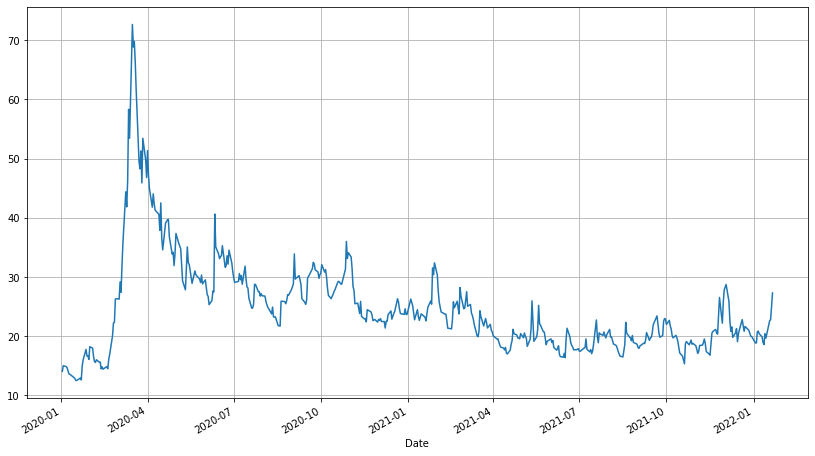

In [71]:
fdr.DataReader('VX', '2020-01-01')['Close'].plot()

## Samsung S&P500 VIX S/T Future ETN(H) B (530065)



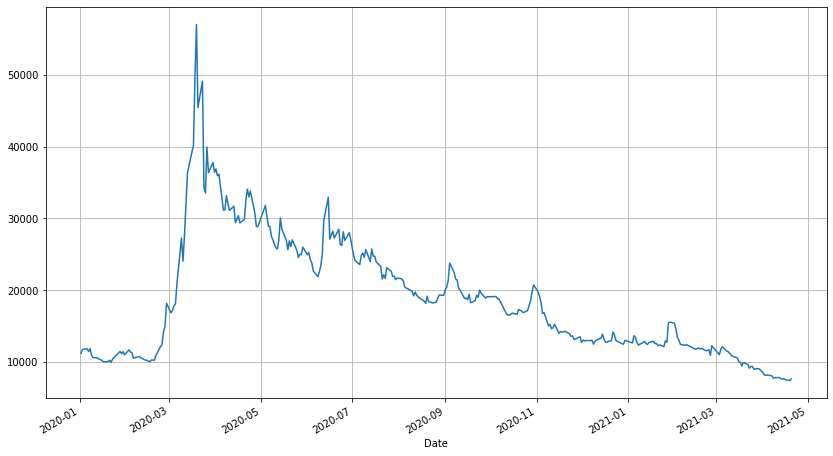

In [73]:
fdr.DataReader('530065', '2020-01-01')['Close'].plot()

In [76]:
returns[-1]

-0.3168007149240393

VXX: iPath Series B S&P 500 VIX Short-Term Futures ETN (NYSE)

VIXY: ProShares VIX Short-Term Futures ETF (NYSE)

VIXM: ProShares VIX Mid-Term Futures ETF (NYSE)

VIIX: VelocityShares Daily Long VIX Short-Term ETN (NASDAQ)

VXZ: iPath Series B S&P 500® VIX Mid-Term Futures ETN (NYSE)

XVZ: iPath S&P 500 Dynamic VIX ETN (NYSE)

EVIX: VelocityShares 1X Long VSTOXX Futures ETN (NYSE)